In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate

In [3]:
!pwd

/groups/funke/home/mehtay/research/plasticity/plotters


In [4]:
# Get all the csv files in the current directory
csv_files = glob.glob("../experiments/logs/simdata/l1_reg/*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)

    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [5]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

['epoch', 'loss', 'r2_score', 'num_exps', 'num_epochs', 'trials_per_block', 'log_interval', 'num_blocks', 'log_expdata', 'use_experimental_data', 'neural_recording_sparsity', 'jobid', 'input_firing_mean', 'input_noise', 'l1_regularization', 'moving_avg_window', 'trainable_coeffs']


In [6]:
# df.drop(df[df["num_epochs"] != num_epochs].index, inplace=True)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["trials_per_block"] = df["trials_per_block"].astype(int)

In [7]:
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
0,0.001013,0.001005,-1.008475e-05,0.000997,0.000986,-0.000016,0.001008,0.001005,-7.643724e-07,0.001010,...,3,True,False,1.0,1,1,0.1,0.01,10,18
1,-0.016352,-0.004578,-1.008475e-05,0.001975,-0.076192,-0.000016,-0.016074,0.038161,-7.643724e-07,0.022178,...,3,True,False,1.0,1,1,0.1,0.01,10,18
2,-0.021126,-0.011592,-1.008475e-05,0.003112,-0.121947,-0.000016,-0.019539,0.064692,-7.643724e-07,0.028929,...,3,True,False,1.0,1,1,0.1,0.01,10,18
3,-0.024382,-0.015459,-1.008475e-05,0.002227,-0.144641,-0.000016,-0.020365,0.079785,-7.643724e-07,0.033037,...,3,True,False,1.0,1,1,0.1,0.01,10,18
4,-0.027067,-0.017683,-1.008475e-05,0.000193,-0.154283,-0.000016,-0.019692,0.086994,-7.643724e-07,0.035474,...,3,True,False,1.0,1,1,0.1,0.01,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.003176,-0.000043,3.719089e-07,0.000020,0.000228,0.000007,0.000089,0.000042,2.838189e-07,0.000042,...,3,True,False,1.0,9,1,0.1,0.10,10,18
296,-0.003300,-0.000351,3.719089e-07,0.000078,-0.000018,0.000007,-0.000138,-0.000282,2.838189e-07,-0.000093,...,3,True,False,1.0,9,1,0.1,0.10,10,18
297,-0.003151,-0.000052,3.719089e-07,0.000065,-0.000035,0.000007,-0.000056,-0.000152,2.838189e-07,0.000126,...,3,True,False,1.0,9,1,0.1,0.10,10,18
298,-0.003234,-0.000107,3.719089e-07,0.000029,0.000036,0.000007,-0.000187,0.000079,2.838189e-07,-0.000044,...,3,True,False,1.0,9,1,0.1,0.10,10,18


In [8]:
print(coeffs)

['A_000', 'A_001', 'A_002', 'A_010', 'A_011', 'A_012', 'A_020', 'A_021', 'A_022', 'A_100', 'A_101', 'A_102', 'A_110', 'A_111', 'A_112', 'A_120', 'A_121', 'A_122', 'A_200', 'A_201', 'A_202', 'A_210', 'A_211', 'A_212', 'A_220', 'A_221', 'A_222']


In [20]:
# take the evolution of plasticity coeffs
df_subset = df.loc[(df['num_epochs'] == 5000) & (df['l1_regularization'] == 5e-3)]

# take only the final coeffs
# df_subset = df.loc[(df['num_epochs'] == 2000) & (df['epoch'] == 1950)]

drop_coeffs = []

for i, coeff in enumerate(coeffs):
    if coeff[-1] == '2':
        drop_coeffs.append(coeff)
        coeffs.pop(i)

for coeff in drop_coeffs:
    df_subset = df_subset.drop(coeff, axis=1)
df_subset.head()

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
200,0.001013,0.001005,-0.00001,0.000997,0.000986,-0.000016,0.001008,0.001005,-7.643724e-07,0.001010,...,3,True,False,1.0,1,1,0.1,0.005,10,18
201,-0.016539,-0.005556,-0.00001,0.003854,-0.075611,-0.000016,-0.016895,0.041244,-7.643724e-07,0.022208,...,3,True,False,1.0,1,1,0.1,0.005,10,18
202,-0.021256,-0.013452,-0.00001,0.012351,-0.125140,-0.000016,-0.021419,0.073153,-7.643724e-07,0.029314,...,3,True,False,1.0,1,1,0.1,0.005,10,18
203,-0.024499,-0.018053,-0.00001,0.020813,-0.153082,-0.000016,-0.023619,0.092873,-7.643724e-07,0.033825,...,3,True,False,1.0,1,1,0.1,0.005,10,18
204,-0.027072,-0.020822,-0.00001,0.028787,-0.169228,-0.000016,-0.024451,0.104140,-7.643724e-07,0.036965,...,3,True,False,1.0,1,1,0.1,0.005,10,18


In [21]:
corr_mat = np.zeros((18,18))
coeffs = sorted(coeffs)

for i, coeff_i in enumerate(coeffs):
    for j, coeff_j in enumerate(coeffs):
        corr_mat[i][j] = np.corrcoef(df_subset[coeff_i],df_subset[coeff_j])[0][1]

<Figure size 432x288 with 0 Axes>

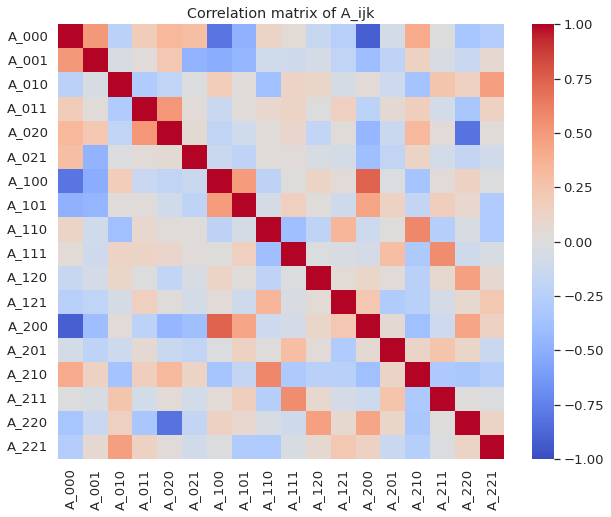

In [23]:
sns.set(font_scale = 1.2)
sns.set_style("white")
plt.tight_layout()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_mat, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=coeffs, yticklabels=coeffs)
plt.title("Correlation matrix of A_ijk")

plt.savefig(f"corr_mat_Aijk_l1_reg5e-3.png", dpi=500)